# **missingno**

#### by Kurstin Guy

missingno is a python package that allows you to visualize any missing values within a dataset to show the completeness or not completeness of the data. Its built using matplotlib and takes any pandas dataframe.

<img src="missingno.png">

## Getting Started

To get started, type **pip install missingno** into your command prompt.

## Example 1: Salaries Based on College

### 1. Dataset

Salaries based on College
https://www.kaggle.com/wsj/college-salaries/data


### 2. Import Data

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

# import some other packages
import numpy as np
import pandas as pd
import seaborn as sns 

In [40]:
df = pd.read_csv("data/salaries-by-college-type.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 8 columns):
School Name                          269 non-null object
School Type                          269 non-null object
Starting Median Salary               269 non-null object
Mid-Career Median Salary             269 non-null object
Mid-Career 10th Percentile Salary    231 non-null object
Mid-Career 25th Percentile Salary    269 non-null object
Mid-Career 75th Percentile Salary    269 non-null object
Mid-Career 90th Percentile Salary    231 non-null object
dtypes: object(8)
memory usage: 16.9+ KB


####  2.1 What is a missing value?

A missing value is when a cell within a data set has no value. In this dataset of Salaries by College Type, we can see that there are null values for "Mid-Career 10th Percentile Salary" and "Mid-Career 90th Percentile Salary" when look at the info of the datasets, but now we will visualize the null values with a matrix, bar chart, and heatmap.

#### 2.2 Why visualize the missing data?

Just like regular data visualization, visualization of missing data allows us to understand and extract information from the dataset. It really allows us to explore the data more when we are able to visualize it. We can do this by creating charts, graphs, heatmaps and matricies to visualize the data.

### 3. Data Visualization

We will begin analyzing the missing data by using various visualization techniques.

#### 3.1 Matrix

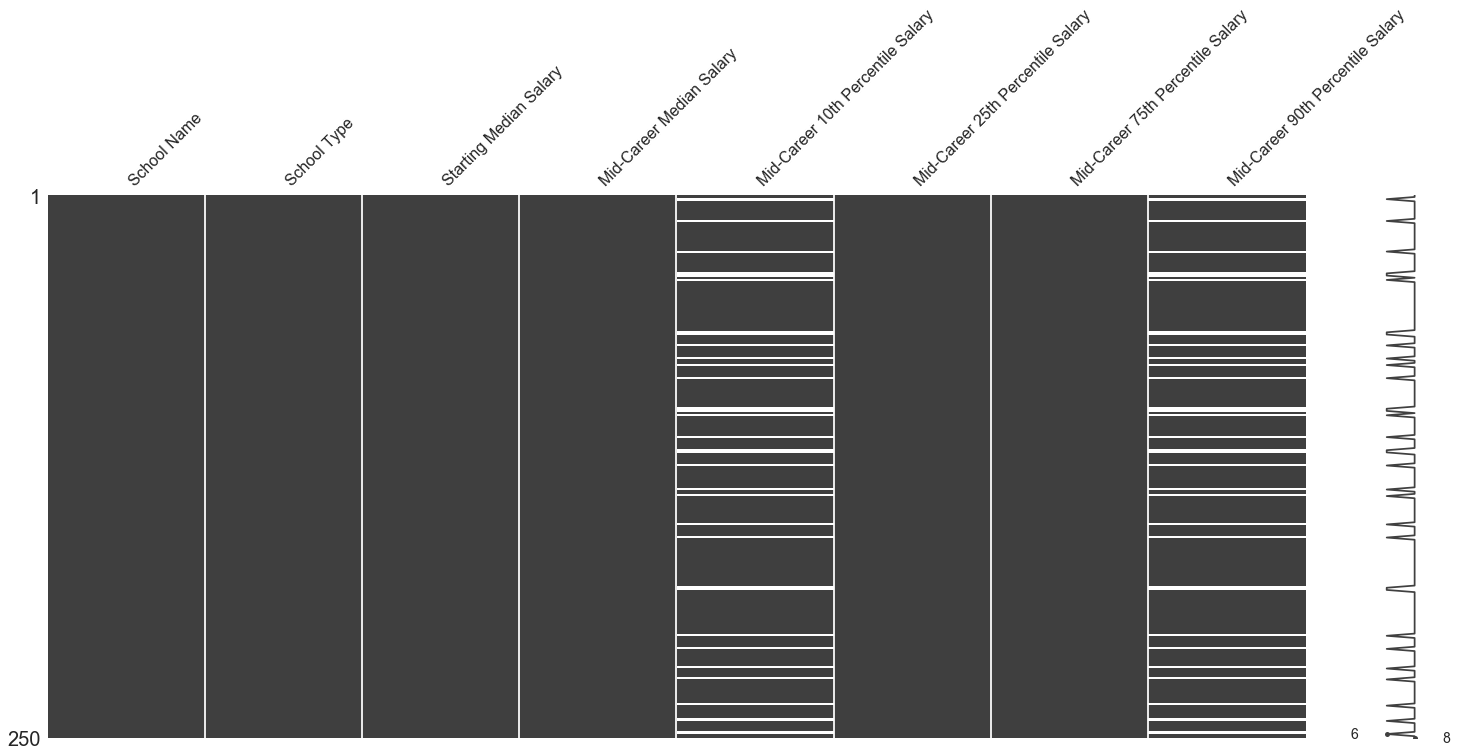

In [41]:
import missingno as msno
%matplotlib inline
msno.matrix(df.sample(250))

When glancing at this matrix, you can see that Mid-Career 10th Percentile Salary and Mid-Career 90th Percentile Salary are not fully populated. This means that they contain null values. You can see this in the white space of the matrix.

The jagged line on the right also shows the completeness of the data and points out the maximum and minimum rows. When looking at this matrix, it is easy to see that the missing values in both columns seem to be in the same rows each time. (This will be clearer when looking at the correlation later on).

Note: We are using a sample of the dataset. As you can see above we are looking at 250 rows of data with this matrix.

#### 3.2 Bar Chart

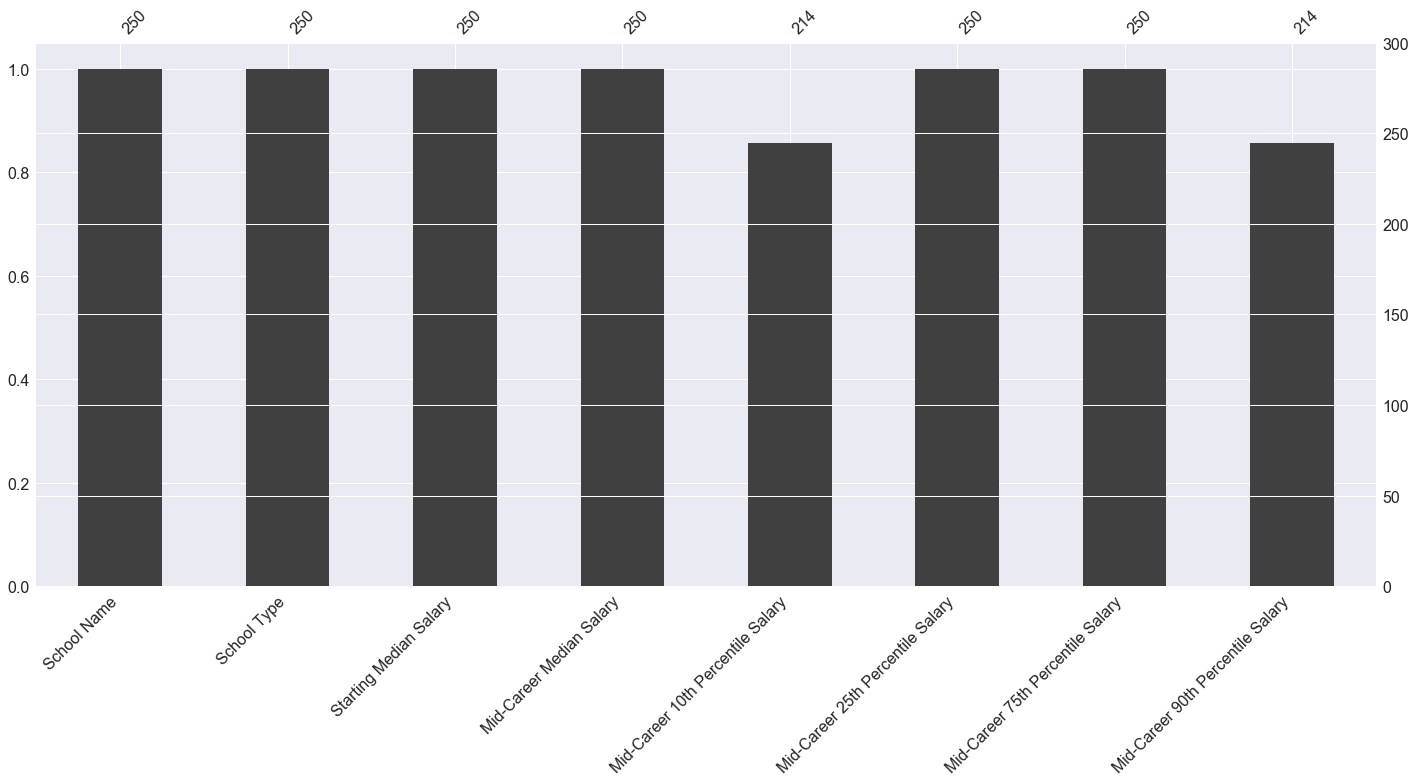

In [42]:
msno.bar(df.sample(250))

The bar chart shows similar evidence that the matrix shows, however instead of showing the rows that are missing, it just shows how many values are missing. Out of the 250 rows of sample data, 216 of them had values in both Mid-Career 10th Percentile Salary and Mid-Career 90th Percentile Salary. This explains that some of those schools do not have information on what a salary might be for a mid-career professional in either the lower 10th percentile or in the higher 90th percentile.

#### 3.3 Heatmap

With this heatmap, the correlation measures how strong the presence or absence of one variable affects the presence of another variable.

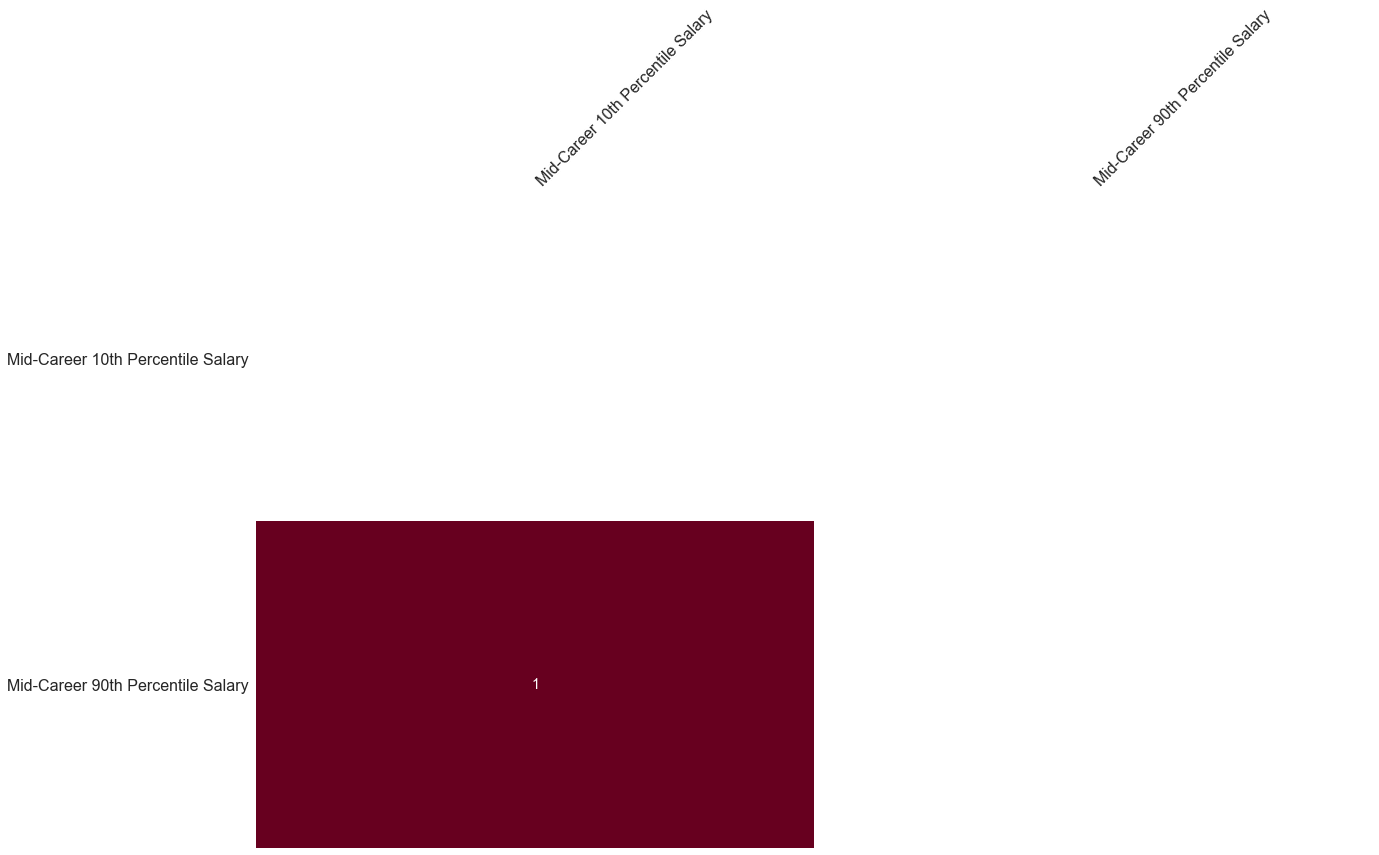

In [43]:
msno.heatmap(df)


Since there are only two columns with missing values, this matrix will be very small because only missing columns will show up on the heatmap. When researching, I found that if the value is 0 then no value will be displayed and if the value is 1 then it means that when the first column is missing the second column is missing also. In this case, when Mid-Career 10th Percentile Salary was missing, Mid-Career 90th Percentile Salary was also missing. This could mean that the schools who have missing values for both, do not determine the 10th and 90th percentile.(http://www.ultravioletanalytics.com/2016/05/20/investigating-missing-data-with-missingno/)

### 4. Analysis

In some cases you can replace missing data with an average or a mean of the all of the data. If we did that, we would take the average of the entire column of the 10th percentile and use that average for all the missing cells. Then we would take the average of the 90th percentile and fill those into the missing cells. However, with this dataset, the 10th and 90th percentile does not seem to be a necessity, so I would ultimately drop the columns and just use the Mid-Career Median Salary for analysis.

Overall, by being able to visualize this data, we were able to correlate that when the 10th percentile was missing, so was the 90th percentile. If we didn't have this visualization, we would not of be able to correlate the missing values in those two columns. It helps us to better understand the data to either fix the data (by adding in the average) or to be able to understand maybe that data is not as revelant and drop it when do analytics. 

## Example 2: Titanic

We will look at another example to help better understand missingno.

### 1. Dataset

Source: https://www.kaggle.com/c/titanic/data

    survival           Survial (0 = No; 1 = Yes)
    pclass             Passenger Class (1st, 2nd, 3rd)
    name               Name
    sex                Sex
    age                Age
    sibsp              Number of Siblings/Spouses Aboard
    parch              Number of Parents/children Aboard
    ticket             Ticket Number
    fare               Passenger Fare
    cabin              Cabin
    embarked           Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southhampton)

### 2. Import Data

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

# import some other packages
import numpy as np
import pandas as pd
import seaborn as sns 

In [45]:
tf = pd.read_csv("data/titanic_train.csv")
tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


** In the second example, I will finish with similar graphs & charts but explain more on how we can evaluate the missing data and transform it to be able to do analysis.


### 3. Data Visualization

#### 3.1 Matrix

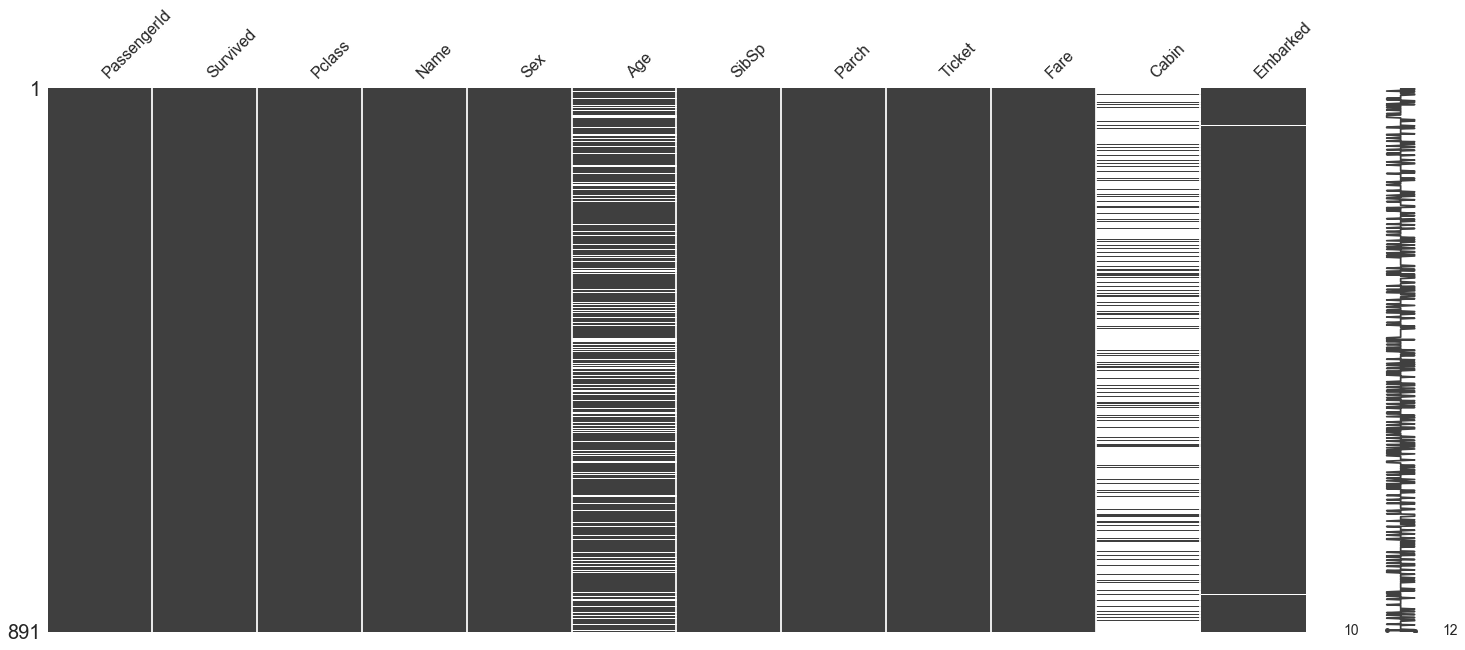

In [46]:
msno.matrix(tf)

#### 3.2 Bar Chart

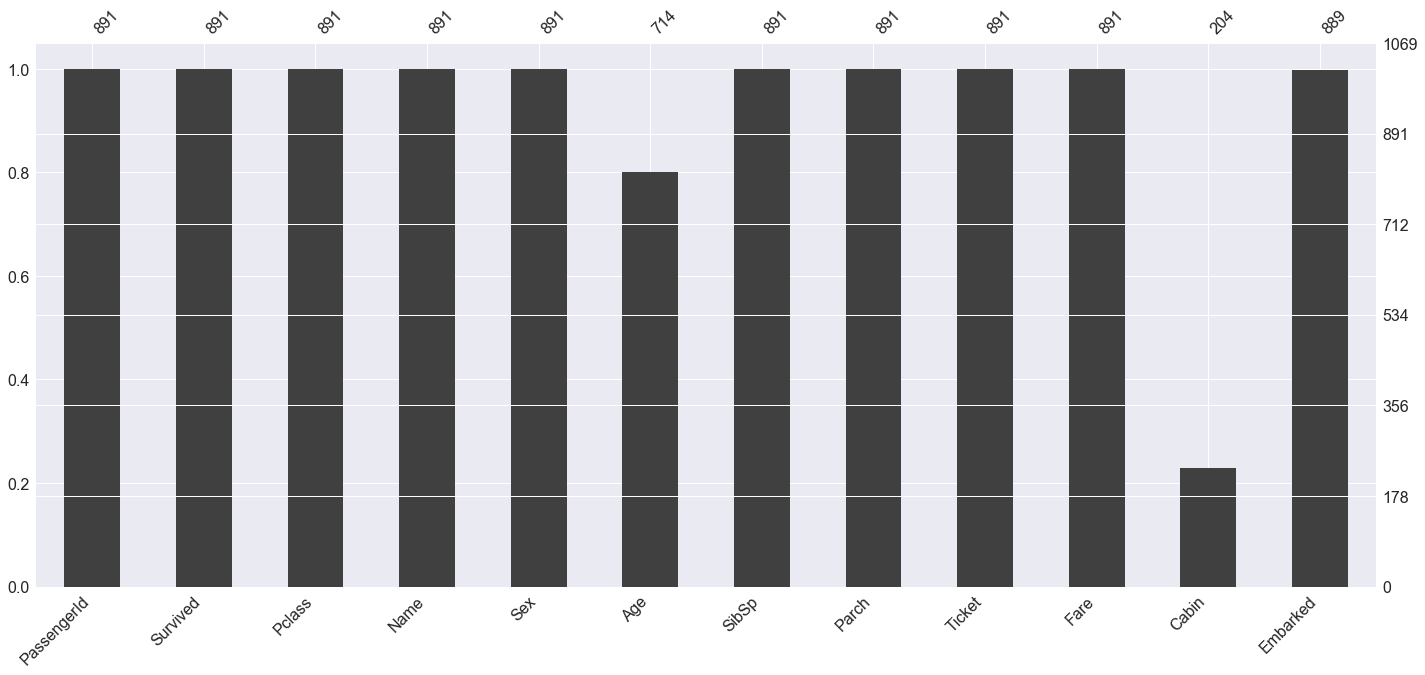

In [47]:
msno.bar(tf)

The bar chart shows the same evidence that finding the info of the dataset does, however this is done with a visualization bar chart. So we can see that Age, Cabin, and Embarked are missing values. This is with the entire data set of 891 values and not a sample. This explains that some of the passenger's age, cabin, and location of embarking were not recorded. Similar to when we used this data set in a previous homework we saw that some of the passengers were missing a value for age. We went ahead and took the median age and replaced the null values with the median age.


#### 3.3 Heatmap

Once again, we will look at a heatmap to see if age correlates with any other null variable. This will help us understand if the missing null values correlate to eachother or not.

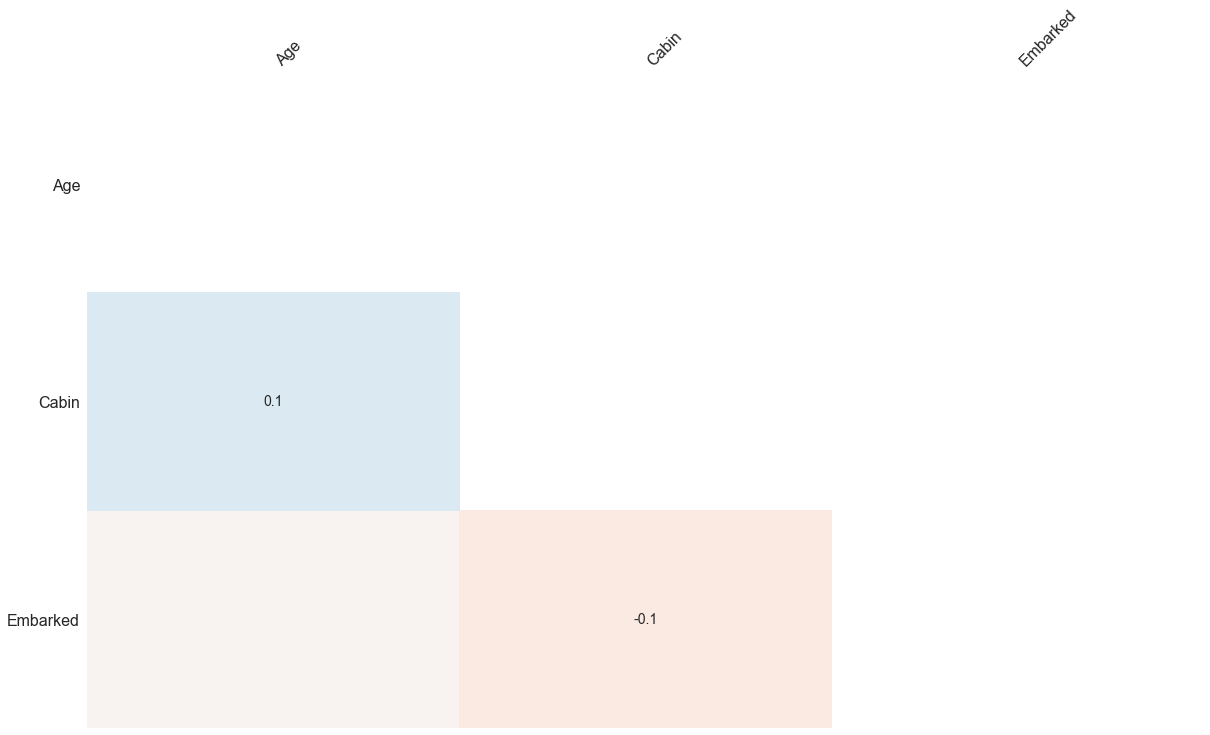

In [48]:
msno.heatmap(tf)

In this case, there is not a significant correlation between any of the null variables. (Meaning that when one variable is null, this does not predict that the other variables will be null).

#### 3.4 Dendrogram

Dendrogram is a hierarchical clustering algorithm that bins variables against one another by their nullity correlation (github). So if you look from top to bottom, the height of the cluster tells you how often the records are incorrectly filed -- so how many values you would have to fill in or drop. 

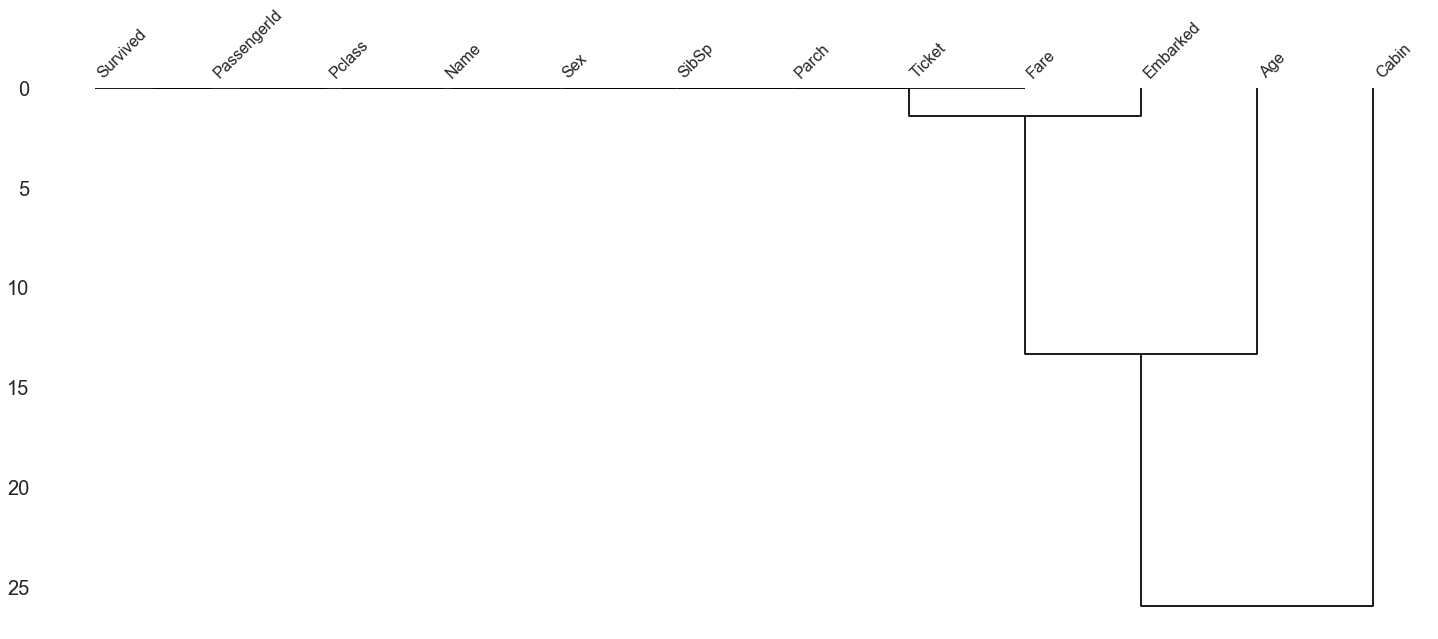

In [49]:
msno.dendrogram(tf)

With this example, you would have to fill or drop more variables in both the Cabin and Age columns.

### 4. Sorting and Filtering

With missingno, you can sort and filter the dataset based on the completion of it (based on the null values). In this example, we will filter down to the bottom 3 columns. The bottom meaning the most uncompleted columns.

#### 4.1 Filtering

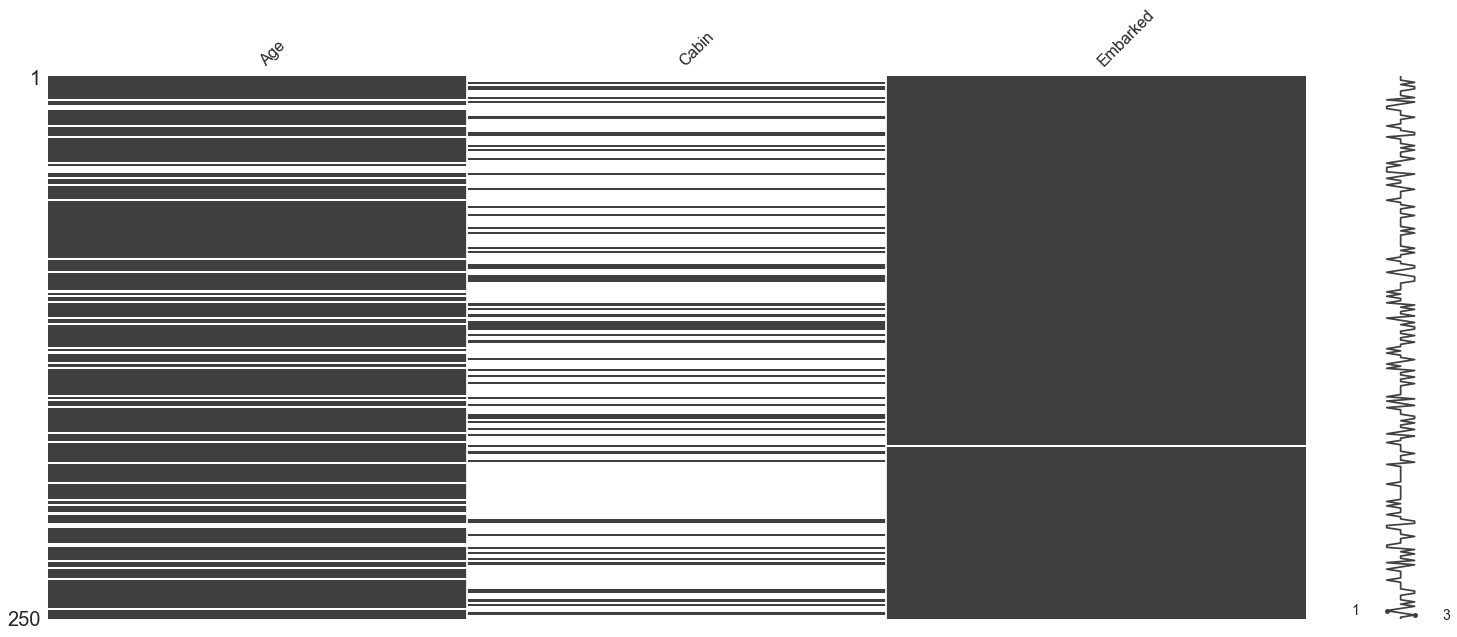

In [60]:
filtered_data = msno.nullity_filter(tf, filter='bottom', n=3) # or filter='top'
msno.matrix(filtered_data.sample(250))

In this example, when we select "bottom" we are selecting the columns that are ranked at the bottom of the data set based on the nullity of the column. 

#### 4.2 Sorting

When sorting by nullity, this will just sort the rows based of of the completeness of the rows. It can either be in ascending or descending order.

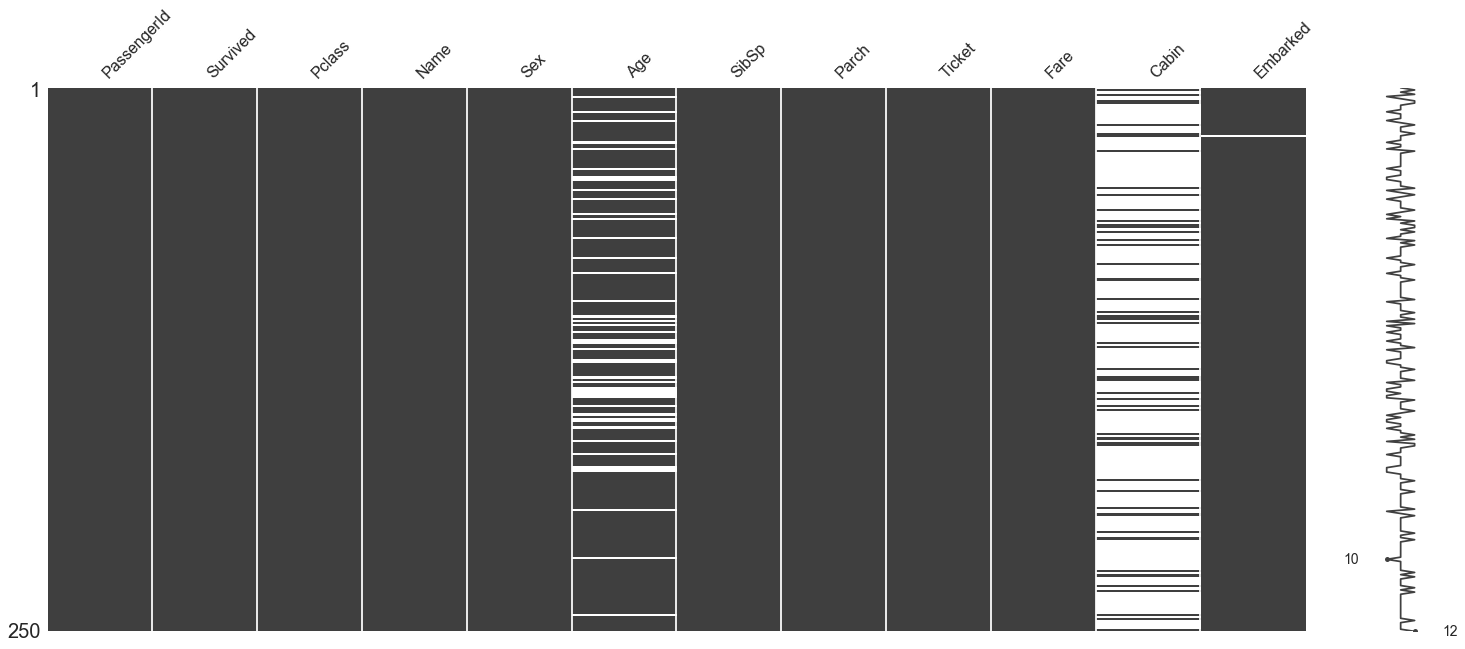

In [63]:
sorted_data = msno.nullity_sort(tf, sort='ascending') # or sort='ascending'
msno.matrix(sorted_data.sample(250))

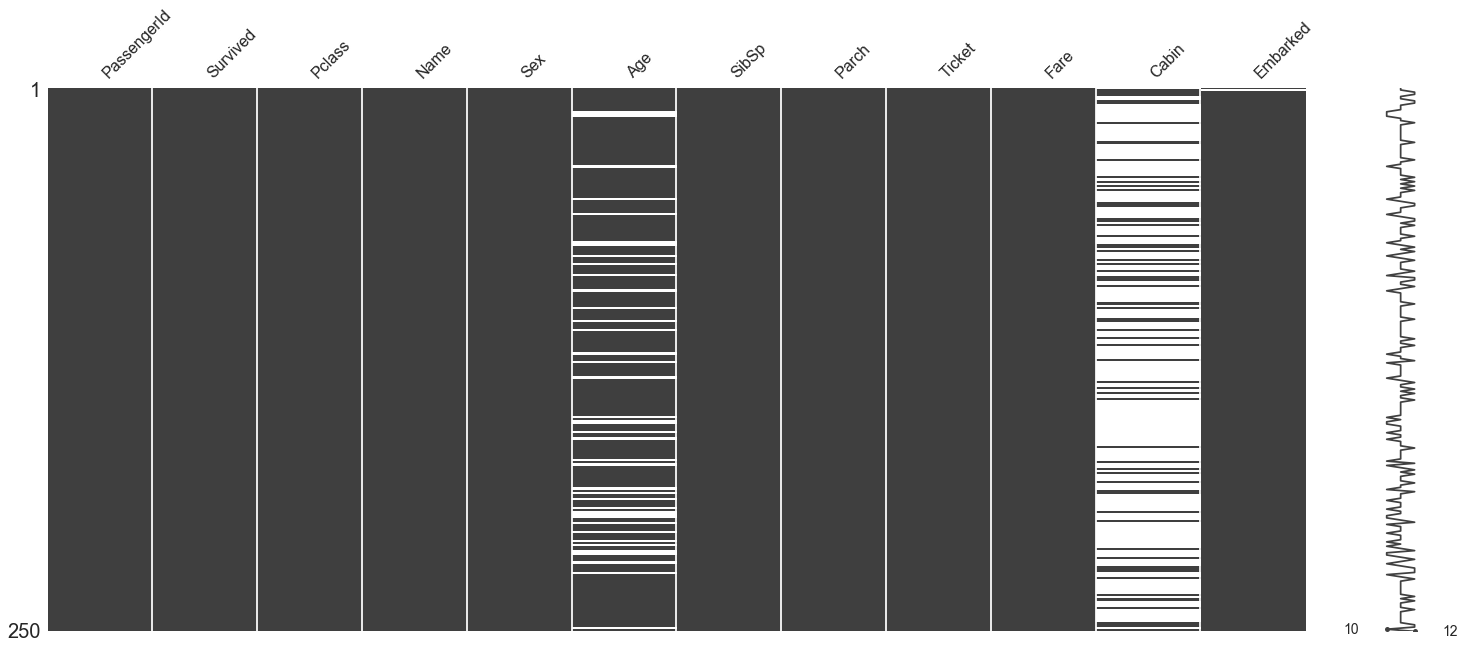

In [64]:
sorted_data = msno.nullity_sort(tf, sort='descending') # or sort='ascending'
msno.matrix(sorted_data.sample(250))

The data will sort based on the completeness of the row, not just one variable. So if Age, Cabin, and Embarked are missing it would be at the top (in the descending chart). Since Age, Cabin, and Embarked are not highly correlated, this means that the data will be missing randomly (hence why the missing values still look random).

#### 4.3 Geoplot

Geoplot is another way of visualizing missing values within a data set. It is used for geographic locations, so you can visualize the missing data based off of a latitude and longitude. Since both data sets do not include a geographic location, I used an example from another tutorial to demonstrate how Geoplot works.

<img src="Geoplot.png">

### Conclusion

Missingno allows you to be able to visualize missing data. This allows the analyst to be able to visually see where data is missing and can come in handy when dealing with large data sets. I would see missingno being useful when needing to figure out if the null values have any impact on the analysis already done. So if you cleaned the data, analyzed it, but realized that a column with some missing values (that maybe got dropped) is actually important in the analysis. You can use missingno to visualize this missing data. 

### Sources

https://github.com/ResidentMario/missingno/blob/master/README.md
http://www.ultravioletanalytics.com/2016/05/20/investigating-missing-data-with-missingno/
https://www.kaggle.com/wsj/college-salaries/data
Titanic Dataset from Dr. Chae